### Problem Statement:

For this particular assignment, the data of different types of wine sales in the 20th century is to be analysed. Both of these data are from the same company but of different wines. As an analyst in the ABC Estate Wines, you are tasked to analyse and forecast Wine Sales in the 20th century.

### QN1 Read the data as an appropriate Time Series data and plot the data.

In [2]:
# For Data Manipulations
import numpy as np # library used for working with arrays
import pandas as pd # library used for data manipulation and analysis
import random as rd # generating random numbers
import datetime # manipulating date formats

# for vissualisation
import matplotlib.pyplot as plt # for basic plots
plt.style.use('fivethirtyeight') 
%matplotlib inline
import seaborn as sns # for pretter plots
from statsmodels.graphics.tsaplots import month_plot
from pylab import rcParams

# Decompose Time series
from statsmodels.tsa.seasonal import seasonal_decompose
# Train Test Split
from sklearn.model_selection import TimeSeriesSplit

# Smoothing
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.api import ExponentialSmoothing,Holt

# Regressions
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB

# TIME SERIES
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller, acf, pacf,arma_order_select_ic
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

#Evaluation Measure
from sklearn import metrics
import statsmodels.tools.eval_measures as em
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

# Setting
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
df = pd.read_csv('Sparkling.csv', parse_dates = ['YearMonth'], index_col = 'YearMonth')

In [4]:
# Checking the Data set
df.head()

,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471


In [5]:
# Checking the shape of Data
print('Shape of Sparkling a TS Data :',df.shape)

Shape of Sparkling a TS Data : (187, 1)


In [6]:
# Dataset Informations
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


Insight:\
1.The Data Set has only One variable that is Sale of Wine Sparkling, with 187 Rows and as Integer 64.\
2.While Year Month has now as Index feature.\
3.No null value appears in this table.

#### Yearly Boxplot

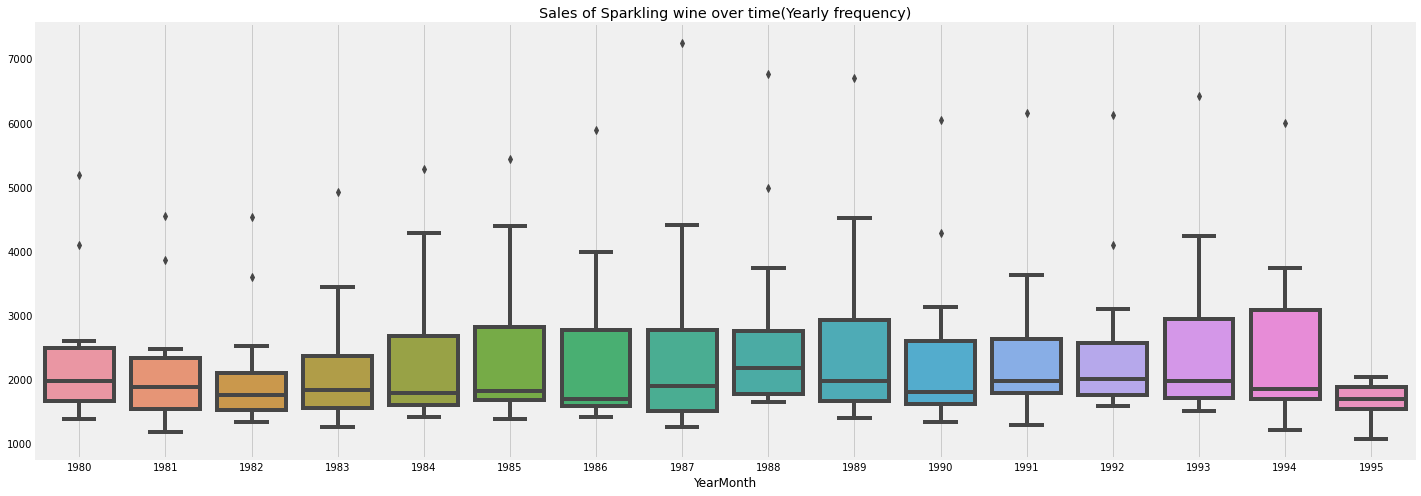

In [7]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.year,y = df.values[:,0],ax=ax)
plt.grid();
plt.title('Sales of Sparkling wine over time(Yearly frequency)');

##### Monthly Boxplot

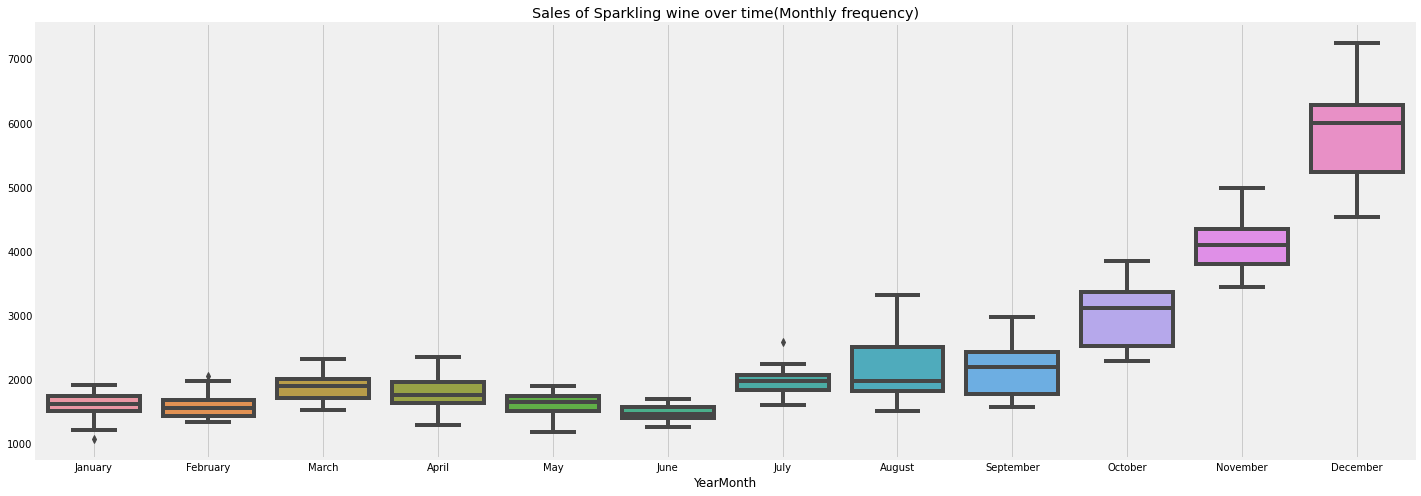

In [8]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.month_name(),y = df.values[:,0],ax=ax)
plt.grid();
plt.title('Sales of Sparkling wine over time(Monthly frequency)');

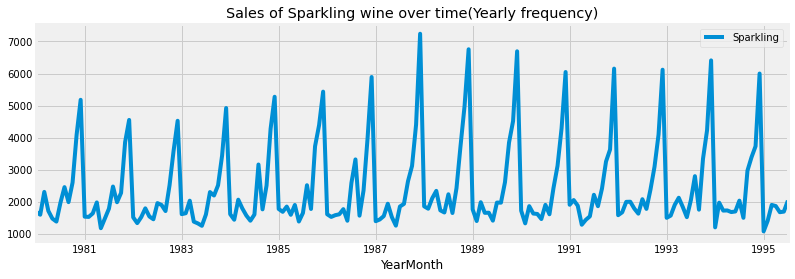

In [9]:
# Plotting of Data
rcParams['figure.figsize'] = 12,4
df.plot()
plt.title('Sales of Sparkling wine over time(Yearly frequency)')
plt.show();

Insights:\
1.In Yearly Box plot there is not fix type of trend can be observed while in Monthly plot the Seasonality can be seen clearly.\
2.There in sharp increase in sale from month of August every year which touches the peak in december.\
3.Where as a normal jump is sale also can be observed in month of March and April.\
4.Month June can be considered as month with very low sale within year of seasonality. \
5.As per sales perspective the minimum sales was in year 1983 was less than 2000 while the highest sales are recorded in year 1988.

### QN2 Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

### Exploratory Data Analysis

In [10]:
# Five fold summary of dataset
df.describe()

,Sparkling
count,187.000000
mean,2402.417112
std,1295.111540
min,1070.000000
25%,1605.000000
50%,1874.000000
75%,2549.000000
max,7242.000000


Insights:\
1.There is difference in mean and median hence data seems as right skewed.\
2.There is large space between minimum sales value and maximum sales values.

In [11]:
# Checking the Null values in dataset
df.isnull().sum()

Sparkling    0
dtype: int64

Insight: \
There is NO any missing value in Sparkling time series dataset.

### Decomposition of Wine Sales 

These are the components of a time series

Trend - Consistent upwards or downwards slope of a time series\
Seasonality - Clear periodic pattern of a time series(like sine funtion)\
Noise/Error - Outliers or missing values
   White noise has...

Constant mean
Constant variance
Zero auto-correlation at all lags

#### Multiplicative Decomposition
1.An Multiplicative model suggests that the components are multipled together.
2.An Multiplicative model is non-linear such as quadratic or exponential.
3.Changes increase or decrease over time.
4.A non-linear seasonality has an increasing or decreasing frequency (width of the cycles) and / or amplitude (height of the cycles) over time.

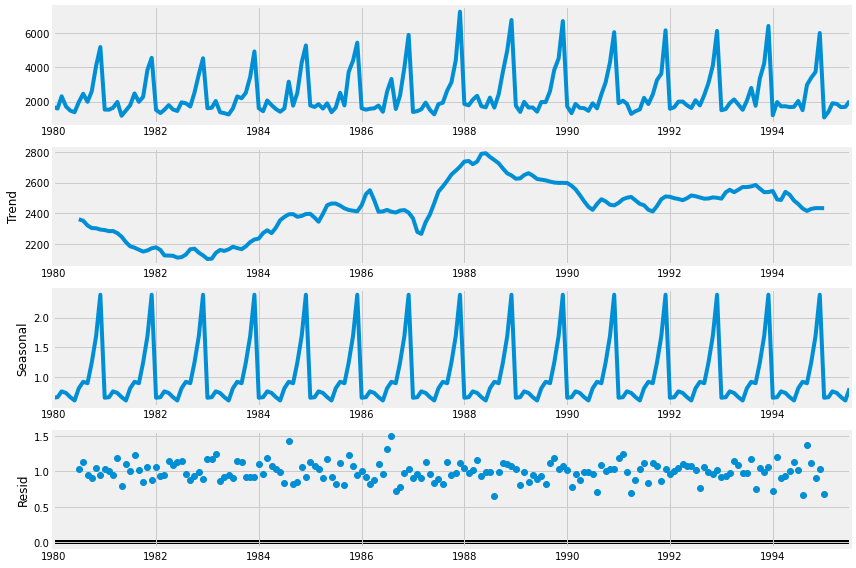

In [12]:
# Decomposition of Wine sales model Multiplicative
rcParams['figure.figsize'] = 12,8
decomposition = seasonal_decompose(df,model='multiplicative',period=12)
decomposition.plot();

#### Additive Decomposition
An additive model suggests that the components are added together.\
An additive model is linear where changes over time are consistently made by the same amount.\
A linear seasonality has the same frequency (width of the cycles) and amplitude (height of the cycles).

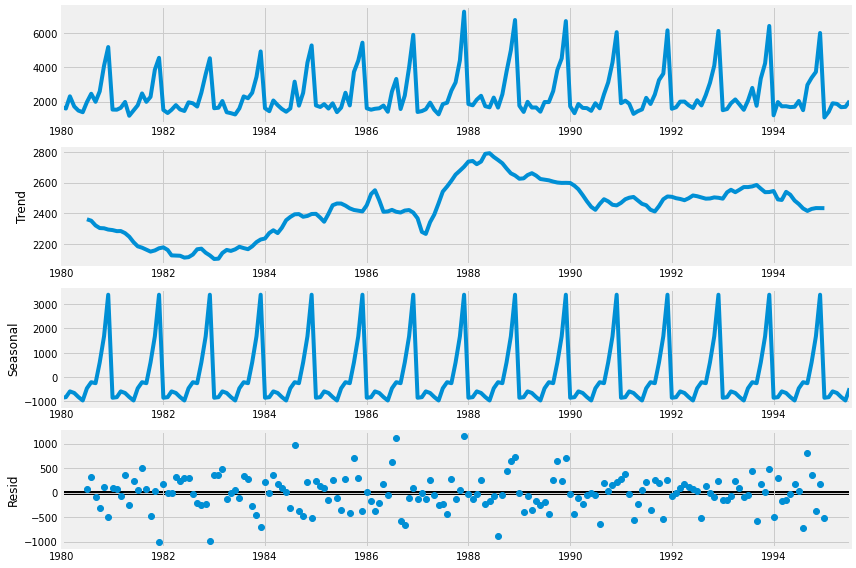

In [13]:
# Decomposition of Wine sales Model Additive
rcParams['figure.figsize'] = 12,8
decomposition = seasonal_decompose(df,model='additive',period=12)
decomposition.plot();

#### Insights:
Some of our key observations from these plots:\
Running the above code performs the decomposition, and plots the 4 resulting series.\
1.We observe that the trend and seasonality are clearly separated.\
2.Trend: The year wise data in plot donnot follow the increasing or decfreasing trend.But Tell the story of Growth and degrowth of Sparkling sales.\
3.Seasonality: Seasonal plot displays a fairly consistent month-on-month pattern. \
4.The residuals are also present and more or less align to centre line.\
5.The Multiplicative model are performing better in decomposition because the residual are more align to center line.


In [14]:
#Let's try to do log transformation
df_log = df.copy()

In [15]:
df_log['Sparkling'] = np.log(df)

In [16]:
df_log.Sparkling

YearMonth
1980-01-01    7.430114
1980-02-01    7.372118
1980-03-01    7.742402
1980-04-01    7.445418
1980-05-01    7.293698
                ...   
1995-03-01    7.548029
1995-04-01    7.529406
1995-05-01    7.420579
1995-06-01    7.431300
1995-07-01    7.616284
Name: Sparkling, Length: 187, dtype: float64

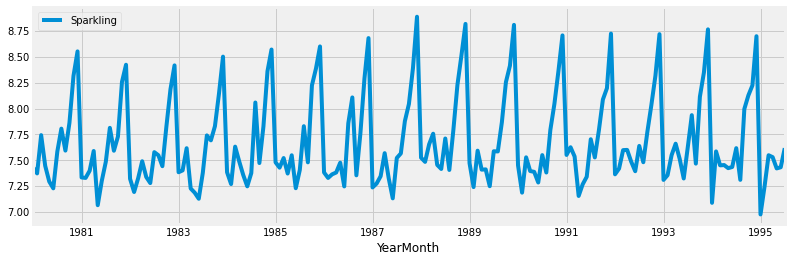

In [17]:
#Visualize the log transformed series
rcParams['figure.figsize'] = 12,4
df_log.plot()
plt.show()

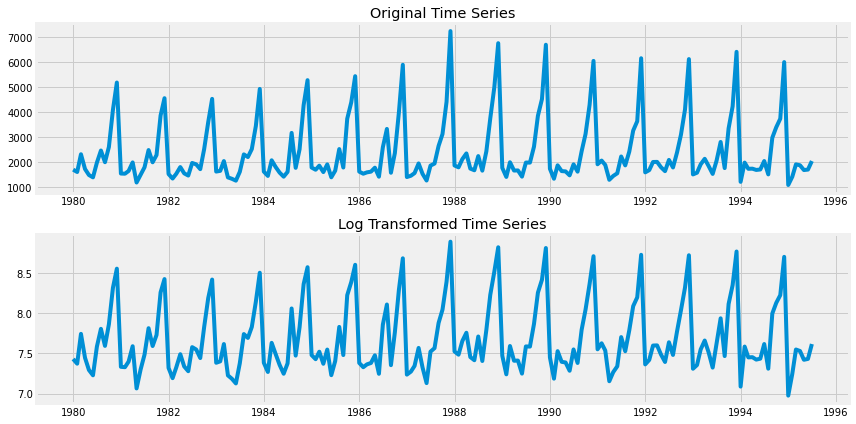

In [18]:
#Compare with the original series with Log series
rcParams['figure.figsize'] = 12,6
plt.subplot(2,1,1)
plt.title('Original Time Series')
plt.plot(df)

plt.subplot(2,1,2)
plt.title('Log Transformed Time Series')
plt.plot(df_log)
plt.tight_layout()

Insight:\
Multiplicative model is more effective over additive model to elaborate the time series dataset.\
There is clear seasonality can be observed across the month for all the year.\
There is no particular but some random trends are in sales of wine  while the peak can be observed between year 1988 to 1990.\
While lowest was in yewar 1983 which was much below the 2000. 

### QN3.Split the data into training and test. The test data should start in 1991.

### Train Test Split
Before a forecast method is proposed, the method needs to be validated. For that purpose, data has to 
be split into two sets i.e. training and testing.\
Training data helps in identifying and fitting right model(s) 
and test data is used to validate the same.\
In case of time series data, the test data is the most recent part of the series so that the ordering in the 
data is preserved.

In [19]:
#Spliting the data into training and testing
Train = df[df.index.year < 1991]
Test = df[df.index.year >= 1991]

In [20]:
# Printing the Sparkling Data
print('Training Data')
display(Train)
print('Test Data')
display(Test)

Training Data


,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471
...,...
1990-08-01,1605
1990-09-01,2424
1990-10-01,3116


Test Data


,Sparkling
YearMonth,
1991-01-01,1902
1991-02-01,2049
1991-03-01,1874
1991-04-01,1279
1991-05-01,1432
1991-06-01,1540
1991-07-01,2214
1991-08-01,1857
1991-09-01,2408


In [21]:
#Checking Shape of data
print('Shape of Sparkling of Train Data :',Train.shape)
print('Shape of Sparkling of Test Data  :',Test.shape)

Shape of Sparkling of Train Data : (132, 1)
Shape of Sparkling of Test Data  : (55, 1)


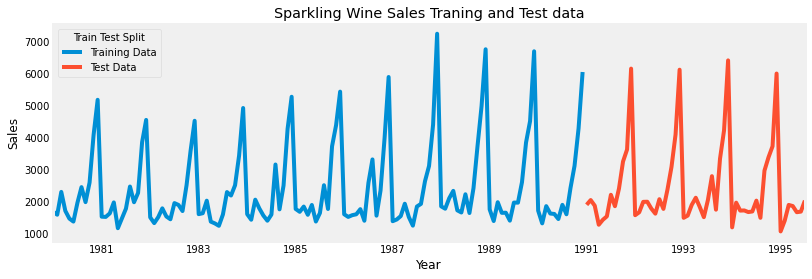

In [22]:
#Plotting the train and test Dataset
rcParams['figure.figsize']=12,4
Train['Sparkling'].plot()
Test['Sparkling'].plot()
plt.grid()
plt.title('Sparkling Wine Sales Traning and Test data')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend(['Training Data','Test Data'],title='Train Test Split');

### QN4. Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models and simple average models. should also be built on the training data and check the performance on the test data using RMSE.

### Exponential Smoothing Method
Smoothing is a technique applied to time series to remove the fine-grained variation between time steps.

Exponential smoothing is a time series forecasting method for univariate data.Exponential smoothing forecasting methods consist of flattening time series data and are similar in that a prediction is a weighted sum of past observations,Exponential smoothing averages or exponentially weighted moving averages consist of forecast based on previous periods data with exponentially declining influence on the older observations.

Exponential smoothing methods consist of special case exponential moving with notation ETS (Error, Trend, Seasonality) where each can be none(N), additive (N), additive damped (Ad), Multiplicative (M) or multiplicative damped (Md).

There are three main types of exponential smoothing time series forecasting methods.


####  SES - ETS(A, N, N) - Simple Exponential Smoothing with additive errors
A simple method that assumes no systematic structure, an extension that explicitly handles trends, and the most advanced approach that add support for seasonality.

Single Exponential Smoothing, SES for short, also called Simple Exponential Smoothing, is a time series forecasting method for univariate data without a trend or seasonality.

           Ŷt+1 = 𝛼𝑌𝑡+𝛼(1−𝛼)𝑌𝑡−1+𝛼(1−𝛼)2𝑌𝑡−1+⋯, 0<𝛼<1

It requires a single parameter, called alpha (a), also called the smoothing factor or smoothing coefficient.

This parameter controls the rate at which the influence of the observations at prior time steps decay exponentially.\
Alpha is often set to a value between 0 and 1.\
Large values mean that the model pays attention mainly to the most recent past observations, whereas smaller values mean more of the history is taken into account when making a prediction.

In [23]:
# create class
model_SES = SimpleExpSmoothing(Train,initialization_method='estimated')

In [24]:
# Fitting the Simple Exponential Smoothing model and asking python to choose the optimal parameters
model_SES_autofit = model_SES.fit(optimized=True)

In [25]:
## Let us check the parameters
model_SES_autofit.params

{'smoothing_level': 0.07028442075641193,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1763.8402828521703,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [26]:
# Using the fitted model on the training set to forecast on the test set
SES_predict = model_SES_autofit.forecast(steps=len(Test))
SES_predict

1991-01-01    2804.650301
1991-02-01    2804.650301
1991-03-01    2804.650301
1991-04-01    2804.650301
1991-05-01    2804.650301
1991-06-01    2804.650301
1991-07-01    2804.650301
1991-08-01    2804.650301
1991-09-01    2804.650301
1991-10-01    2804.650301
1991-11-01    2804.650301
1991-12-01    2804.650301
1992-01-01    2804.650301
1992-02-01    2804.650301
1992-03-01    2804.650301
1992-04-01    2804.650301
1992-05-01    2804.650301
1992-06-01    2804.650301
1992-07-01    2804.650301
1992-08-01    2804.650301
1992-09-01    2804.650301
1992-10-01    2804.650301
1992-11-01    2804.650301
1992-12-01    2804.650301
1993-01-01    2804.650301
1993-02-01    2804.650301
1993-03-01    2804.650301
1993-04-01    2804.650301
1993-05-01    2804.650301
1993-06-01    2804.650301
1993-07-01    2804.650301
1993-08-01    2804.650301
1993-09-01    2804.650301
1993-10-01    2804.650301
1993-11-01    2804.650301
1993-12-01    2804.650301
1994-01-01    2804.650301
1994-02-01    2804.650301
1994-03-01  

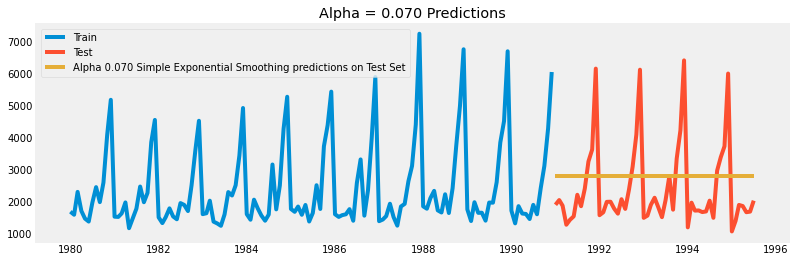

In [27]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(Train, label='Train')
plt.plot(Test, label='Test')

plt.plot(SES_predict, label='Alpha 0.070 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.070 Predictions');

Insights:\
The simple Exponential model predicting the straight line, which does not support the level trend and seasonality complete missing.\
So this model would not work.


##### SES  Model Accuracy

In [28]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [29]:
print('SES RMSE:',mean_squared_error(Test.values,SES_predict.values,squared=False))
#different way to calculate RMSE
#print('SES RMSE (calculated using statsmodels):',em.rmse(Test.values,SES_predict.values)[0])

SES RMSE: 1338.0008612252468


In [30]:
resultsDf = pd.DataFrame({'Test RMSE': [em.rmse(Test.values,SES_predict.values)[0]]},index=['Alpha=0.70,SES'])
resultsDf

,Test RMSE
"Alpha=0.70,SES",1338.000861


#### Double Exponential Smoothing  or Holt - ETS(A, A, N) - Holt's linear method with additive errors 
Double Exponential Smoothing is an extension to Exponential Smoothing that explicitly adds support for trends in the univariate time series.

        Forecast equation : Ŷ𝑡+1=𝑙𝑡+𝑏𝑡
        Level Equation : 𝑙𝑡=𝛼𝑌𝑡+𝛼(1−𝛼)𝑌𝑡−1, 0 < 𝛼 < 1
        Trend Equation : 𝑏𝑡=𝛽(𝑙𝑡−𝑙𝑡−1)+(1−𝛽)𝑏𝑡−1, 0 < 𝛽 < 1
        where, 𝑙𝑡 is the estimate of level and 𝑏𝑡 is the trend estimate.
        𝛼is the smoothing parameter for the level and 𝛽 is the smoothing parameter for trend.

In addition to the alpha parameter for controlling smoothing factor for the level, an additional smoothing factor is added to control the decay of the influence of the change in trend called beta (b).

The method supports trends that change in different ways: an additive and a multiplicative, depending on whether the trend is linear or exponential respectively.

Double Exponential Smoothing with an additive trend is classically referred to as Holt’s linear trend model, named for the developer of the method Charles Holt.

Additive Trend: Double Exponential Smoothing with a linear trend.
Multiplicative Trend: Double Exponential Smoothing with an exponential trend.
For longer range (multi-step) forecasts, the trend may continue on unrealistically. As such, it can be useful to dampen the trend over time.

     Hyperparameters:

        Alpha: Smoothing factor for the level.
        Beta: Smoothing factor for the trend.
        Trend Type: Additive or multiplicative.
        Dampen Type: Additive or multiplicative.
        Phi: Damping coefficient.


In [31]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(Train,initialization_method='estimated')
# Fitting the model
model_DES = model_DES.fit()

print('')
print('-----Holt model Exponential Smoothing Estimated Parameters ---')
print('')
print(model_DES.params)


-----Holt model Exponential Smoothing Estimated Parameters ---

{'smoothing_level': 0.6649999999999999, 'smoothing_trend': 0.0001, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1502.1999999999991, 'initial_trend': 74.87272727272739, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [32]:
# Forecasting using this model for the duration of the test set
DES_predict =  model_DES.forecast(len(Test))
DES_predict

1991-01-01    5401.733026
1991-02-01    5476.005230
1991-03-01    5550.277433
1991-04-01    5624.549637
1991-05-01    5698.821840
1991-06-01    5773.094044
1991-07-01    5847.366248
1991-08-01    5921.638451
1991-09-01    5995.910655
1991-10-01    6070.182858
1991-11-01    6144.455062
1991-12-01    6218.727266
1992-01-01    6292.999469
1992-02-01    6367.271673
1992-03-01    6441.543876
1992-04-01    6515.816080
1992-05-01    6590.088284
1992-06-01    6664.360487
1992-07-01    6738.632691
1992-08-01    6812.904894
1992-09-01    6887.177098
1992-10-01    6961.449302
1992-11-01    7035.721505
1992-12-01    7109.993709
1993-01-01    7184.265912
1993-02-01    7258.538116
1993-03-01    7332.810320
1993-04-01    7407.082523
1993-05-01    7481.354727
1993-06-01    7555.626930
1993-07-01    7629.899134
1993-08-01    7704.171338
1993-09-01    7778.443541
1993-10-01    7852.715745
1993-11-01    7926.987948
1993-12-01    8001.260152
1994-01-01    8075.532356
1994-02-01    8149.804559
1994-03-01  

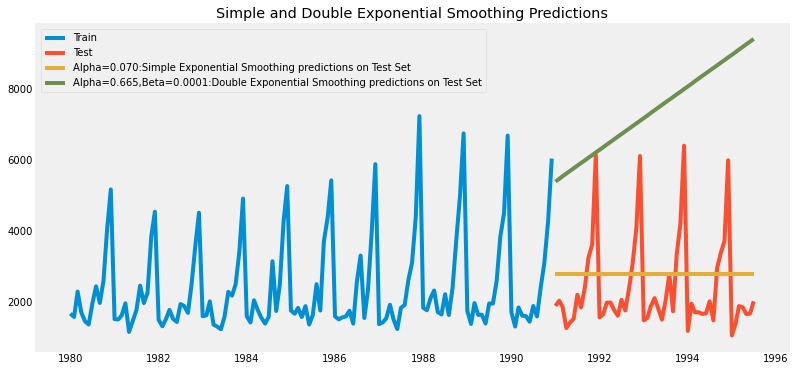

In [33]:
## Plotting the Training data, Test data and the forecasted values
rcParams['figure.figsize'] = 12,6
plt.plot(Train, label='Train')
plt.plot(Test, label='Test')

plt.plot(SES_predict, label='Alpha=0.070:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.665,Beta=0.0001:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions');


##### DES  Model Accuracy

In [34]:
print('SES RMSE (calculated using statsmodels):',em.rmse(Test.values,DES_predict.values)[0])

SES RMSE (calculated using statsmodels): 3262.10733251485


In [35]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(Test.values,DES_predict.values,squared=False)]}
                           ,index=['Alpha=.665,Beta=0.0001:DES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha=0.70,SES",1338.000861
"Alpha=.665,Beta=0.0001:DES",5291.879833


#### Inferences: 
1.Double Exponential model with low AIC value of(Alpha=.665,Beta=0.0001) giving the high to RSME 5291.87.\
2.The plot trend is also not supporting the outcome.


#### Triple Exponential Smoothing or Holt-Winters - ETS(A, A, A) - Holt Winter's linear method with additive errors
Triple Exponential Smoothing is an extension of Exponential Smoothing that explicitly adds support for seasonality to the univariate time series.

        This is an extension of Holt’s method when seasonality is found in the data.
        Forecast equation:Y𝑡+1=𝑙𝑡+𝑏𝑡+𝑠𝑡−𝑚(𝑘+1)
        Level Equation:𝑙𝑡=𝛼(𝑌𝑡−𝑠𝑡−𝑚)+𝛼(1−𝛼)𝑌𝑡−1, 0 < 𝛼 < 1
        Trend Equation:𝑏𝑡=𝛽(𝑙𝑡−𝑙𝑡−1)+(1−𝛽)𝑏𝑡−1, 0 < 𝛽 < 1
        Seasonal Equation: 𝛾(𝑌𝑡−𝑙𝑡−1−𝑏𝑡−1)+(1−𝛾)𝑠𝑡−𝑚, 0 < 𝛾 < 1
        This is also known as three parameters exponential or triple exponential because of the three 
        smoothing parameters 𝛼, 𝛽 and 𝛾. This is a general method and a true multi-step ahead forecast. 


In addition to the alpha and beta smoothing factors, a new parameter is added called gamma (g) that controls the influence on the seasonal component.

As with the trend, the seasonality may be modelled as either an additive or multiplicative process for a linear or exponential change in the seasonality.

Additive Seasonality: Triple Exponential Smoothing with a linear seasonality.
Multiplicative Seasonality: Triple Exponential Smoothing with an exponential seasonality.
Triple exponential smoothing is the most advanced variation of exponential smoothing and through configuration, it can also develop double and single exponential smoothing models.

This method is sometimes called Holt-Winters Exponential Smoothing, named for two contributors to the method: Charles Holt and Peter Winters.

      Hyperparameters:

        Alpha: Smoothing factor for the level.
        Beta: Smoothing factor for the trend.
        Gamma: Smoothing factor for the seasonality.
        Trend Type: Additive or multiplicative.
        Dampen Type: Additive or multiplicative.
        Phi: Damping coefficient.
        Seasonality Type: Additive or multiplicative.
        Period: Time steps in seasonal period.


In [36]:
# Initializing the Triple Exponential Smoothing Model
model_TES = ExponentialSmoothing(Train,trend='additive',seasonal='additive',initialization_method='estimated')
# Fitting the model
model_TES = model_TES.fit()

print('')
print('---Holt Winters model Exponential Smoothing Estimated Parameters----')
print('')
print(model_TES.params)


---Holt Winters model Exponential Smoothing Estimated Parameters----

{'smoothing_level': 0.11127217693511166, 'smoothing_trend': 0.012360783126182025, 'smoothing_seasonal': 0.4607177659431463, 'damping_trend': nan, 'initial_level': 2356.5783078812697, 'initial_trend': -0.018442178724720648, 'initial_seasons': array([-636.23349205, -722.98346399, -398.64349841, -473.43073157,
       -808.42502897, -815.35019273, -384.23061339,   72.99513671,
       -237.44278517,  272.32607144, 1541.37826596, 2590.07759442]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [37]:
# Forecasting using this model for the duration of the test set
TES_predict =  model_TES.forecast(len(Test))
TES_predict

1991-01-01    1490.574618
1991-02-01    1204.714535
1991-03-01    1688.941336
1991-04-01    1551.451059
1991-05-01    1461.440697
1991-06-01    1278.907452
1991-07-01    1805.164331
1991-08-01    1679.251719
1991-09-01    2315.687997
1991-10-01    3225.309274
1991-11-01    4299.652749
1991-12-01    6411.161831
1992-01-01    1483.297096
1992-02-01    1197.437013
1992-03-01    1681.663814
1992-04-01    1544.173537
1992-05-01    1454.163175
1992-06-01    1271.629930
1992-07-01    1797.886809
1992-08-01    1671.974197
1992-09-01    2308.410475
1992-10-01    3218.031752
1992-11-01    4292.375227
1992-12-01    6403.884309
1993-01-01    1476.019574
1993-02-01    1190.159491
1993-03-01    1674.386292
1993-04-01    1536.896015
1993-05-01    1446.885653
1993-06-01    1264.352408
1993-07-01    1790.609287
1993-08-01    1664.696675
1993-09-01    2301.132953
1993-10-01    3210.754230
1993-11-01    4285.097705
1993-12-01    6396.606787
1994-01-01    1468.742052
1994-02-01    1182.881969
1994-03-01  

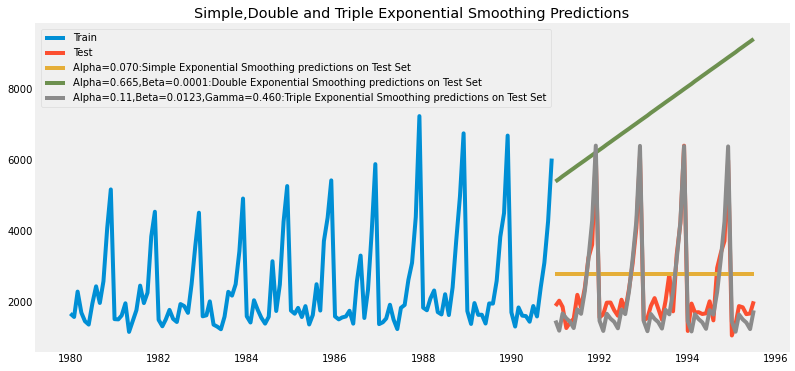

In [38]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(Train, label='Train')
plt.plot(Test, label='Test')

plt.plot(SES_predict, label='Alpha=0.070:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.665,Beta=0.0001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.11,Beta=0.0123,Gamma=0.460:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');


##### TES Model Accuracy

In [39]:
print('TES RMSE:',mean_squared_error(Test.values,TES_predict.values,squared=False))

TES RMSE: 378.6258830010025


In [40]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(Test.values,TES_predict.values,squared=False)]}
                           ,index=['Alpha=0.11,Beta=0.012,Gamma=0.460:TES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha=0.70,SES",1338.000861
"Alpha=.665,Beta=0.0001:DES",5291.879833
"Alpha=0.11,Beta=0.012,Gamma=0.460:TES",378.625883


Inferences:\
1.Triple Exponential Smoothing with Lowest AIC(Alpha=0.11,Beta=0.012,Gamma=0.460) has given the Low RMSE value as 378.62.\
2.Which is comparatively better over last two models RSME score.\
3.Error Lower model better.\
4.In plot the clear trend and seasonlity cane be defined by this model.

##### Holt-Winters - ETS(A, A, M) - Holt Winter's linear method
 ETS(A, A, M) model

In [41]:
# Initializing the Double Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(Train,trend='add',seasonal='multiplicative',initialization_method='estimated')
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('----Holt Winters model Exponential Smoothing Estimated Parameters---')
print('')
print(model_TES_am.params)


----Holt Winters model Exponential Smoothing Estimated Parameters---

{'smoothing_level': 0.11101471561088701, 'smoothing_trend': 0.0493145907614654, 'smoothing_seasonal': 0.36244934537370843, 'damping_trend': nan, 'initial_level': 2356.496908624238, 'initial_trend': -9.809526161838415, 'initial_seasons': array([0.713711  , 0.68278724, 0.90458411, 0.8053878 , 0.65571739,
       0.65388935, 0.88616088, 1.13350811, 0.91894498, 1.21186447,
       1.87099202, 2.37505867]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [42]:
# Forecasting using this model for the duration of the test set
TES_predict_am =  model_TES_am.forecast(len(Test))
TES_predict_am

1991-01-01    1587.923122
1991-02-01    1356.650595
1991-03-01    1763.350752
1991-04-01    1656.524633
1991-05-01    1542.386930
1991-06-01    1355.481373
1991-07-01    1854.708133
1991-08-01    1820.662236
1991-09-01    2277.677337
1991-10-01    3123.119233
1991-11-01    4130.016390
1991-12-01    5893.151561
1992-01-01    1539.027193
1992-02-01    1314.768627
1992-03-01    1708.772893
1992-04-01    1605.120587
1992-05-01    1494.400631
1992-06-01    1313.200407
1992-07-01    1796.704221
1992-08-01    1763.574290
1992-09-01    2206.072310
1992-10-01    3024.677525
1992-11-01    3999.494123
1992-12-01    5706.416565
1993-01-01    1490.131264
1993-02-01    1272.886659
1993-03-01    1654.195033
1993-04-01    1553.716542
1993-05-01    1446.414333
1993-06-01    1270.919441
1993-07-01    1738.700308
1993-08-01    1706.486345
1993-09-01    2134.467283
1993-10-01    2926.235817
1993-11-01    3868.971855
1993-12-01    5519.681569
1994-01-01    1441.235336
1994-02-01    1231.004691
1994-03-01  

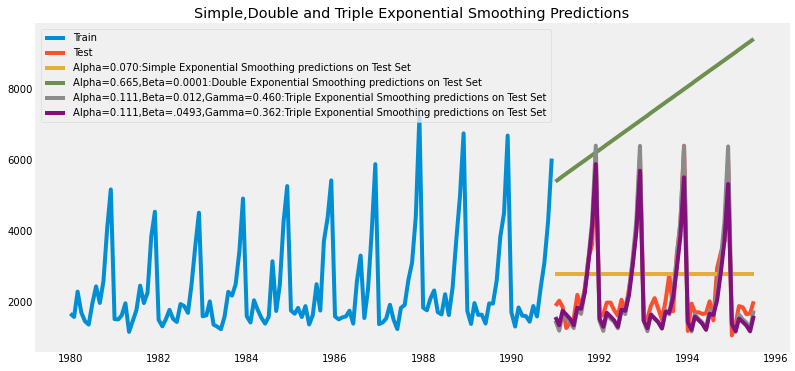

In [43]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(Train, label='Train')
plt.plot(Test, label='Test')

plt.plot(SES_predict, label='Alpha=0.070:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.665,Beta=0.0001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.111,Beta=0.012,Gamma=0.460:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_am, label='Alpha=0.111,Beta=.0493,Gamma=0.362:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

##### TES Model Accuracy 

In [44]:
print('TES_am RMSE:',mean_squared_error(Test.values,TES_predict_am.values,squared=False))

TES_am RMSE: 402.93617908586907


In [45]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(Test.values,TES_predict_am.values,squared=False)]}
                           ,index=['Alpha=0.111,Beta=0.0493,Gamma=0.362:TES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha=0.70,SES",1338.000861
"Alpha=.665,Beta=0.0001:DES",5291.879833
"Alpha=0.11,Beta=0.012,Gamma=0.460:TES",378.625883
"Alpha=0.111,Beta=0.0493,Gamma=0.362:TES",402.936179


Inference:\
Among all the the Triple Exponential Smoothing has performed the best on the test as expected since the data had both trend and seasonality.

### Building different models and comparing the accuracy metrics.

##### Model 1: Linear Regression
A time series regression forecasts a time series as a linear relationship with the independent variables. The linear regression model assumes there is a linear relationship between the forecast variable and the predictor variables

For this particular linear regression, we are going to regress the 'Sparkling' variable against the order of the occurrence. For this we need to modify our training data before fitting it into a linear regression.

In [46]:
train_time = [i+1 for i in range(len(Train))]
test_time = [i+43 for i in range(len(Test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97]


In [47]:
LinearRegression_train = Train.copy()
LinearRegression_test = Test.copy()

In [48]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             Sparkling  time
YearMonth                  
1980-01-01       1686     1
1980-02-01       1591     2
1980-03-01       2304     3
1980-04-01       1712     4
1980-05-01       1471     5 

Last few rows of Training Data 
             Sparkling  time
YearMonth                  
1990-08-01       1605   128
1990-09-01       2424   129
1990-10-01       3116   130
1990-11-01       4286   131
1990-12-01       6047   132 

First few rows of Test Data 
             Sparkling  time
YearMonth                  
1991-01-01       1902    43
1991-02-01       2049    44
1991-03-01       1874    45
1991-04-01       1279    46
1991-05-01       1432    47 

Last few rows of Test Data 
             Sparkling  time
YearMonth                  
1995-03-01       1897    93
1995-04-01       1862    94
1995-05-01       1670    95
1995-06-01       1688    96
1995-07-01       2031    97 



In [49]:
# Defining the Linear Regression
lr = LinearRegression()

In [50]:
# Fitting of Train and test data
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'].values)

LinearRegression()

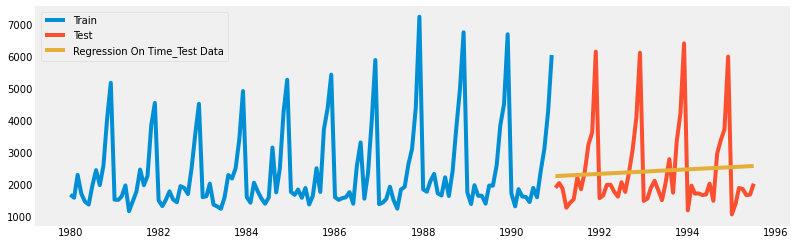

In [51]:
#Plotting the Linear Regression
test_predictions_model1  = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(12,4))
plt.plot( Train['Sparkling'], label='Train')
plt.plot(Test['Sparkling'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

#### LR Model Evaluation

In [52]:
## Test Data - RMSE
rmse_model1_test = metrics.mean_squared_error(Test['Sparkling'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1275.867


In [53]:
# Comparing the RSMEs 
resultsDf_temp = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha=0.70,SES",1338.000861
"Alpha=.665,Beta=0.0001:DES",5291.879833
"Alpha=0.11,Beta=0.012,Gamma=0.460:TES",378.625883
"Alpha=0.111,Beta=0.0493,Gamma=0.362:TES",402.936179
RegressionOnTime,1275.867052


Inferences:\
The Linear Regression models giving the RMSE 1275.86 which is much higher than the TES Model.
    

##### Model 2: Naive Approach:  y^t+1=yt

The Naive Bayes method is a classification algorithm that uses Bayes’ theorem to predict the probability of a class given a set of features. However, there is a method called Naive Method which uses the most recent value as the forecasted value for the next time step. The assumption followed by this method is that its value tomorrow is equal to its value today    

In [54]:
NaiveModel_train = Train.copy()
NaiveModel_test = Test.copy()

In [55]:
NaiveModel_test['naive'] = np.asarray(Train['Sparkling'])[len(np.asarray(Train['Sparkling']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-01    6047
1991-02-01    6047
1991-03-01    6047
1991-04-01    6047
1991-05-01    6047
Name: naive, dtype: int64

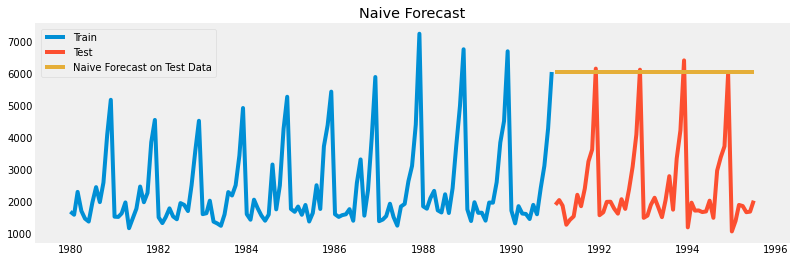

In [56]:
plt.figure(figsize=(12,4))
plt.plot(NaiveModel_train['Sparkling'], label='Train')
plt.plot(Test['Sparkling'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

#### Naive Model Evaluation

In [57]:
## Test Data - RMSE

rmse_model2_test = metrics.mean_squared_error(Test['Sparkling'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 3864.279


In [58]:
# Comparing the RSMEs 
resultsDf_temp = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['Naive Model'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha=0.70,SES",1338.000861
"Alpha=.665,Beta=0.0001:DES",5291.879833
"Alpha=0.11,Beta=0.012,Gamma=0.460:TES",378.625883
"Alpha=0.111,Beta=0.0493,Gamma=0.362:TES",402.936179
RegressionOnTime,1275.867052
Naive Model,3864.279352


Inferences:\
The Naive model uses the last value for forecasting hence the RSME value are too hight to 3864.27.

### Simple Average Model

The method is very simple: average the data by months or quarters or years and them calculate the average for the period. Then find out, what percentage it is to the grand average.

In [59]:
SimpleAverage_train = Train.copy()
SimpleAverage_test = Test.copy()

In [60]:
SimpleAverage_test['mean_forecast'] = Train['Sparkling'].mean()
SimpleAverage_test.head()

,Sparkling,mean_forecast
YearMonth,,
1991-01-01,1902,2403.780303
1991-02-01,2049,2403.780303
1991-03-01,1874,2403.780303
1991-04-01,1279,2403.780303
1991-05-01,1432,2403.780303


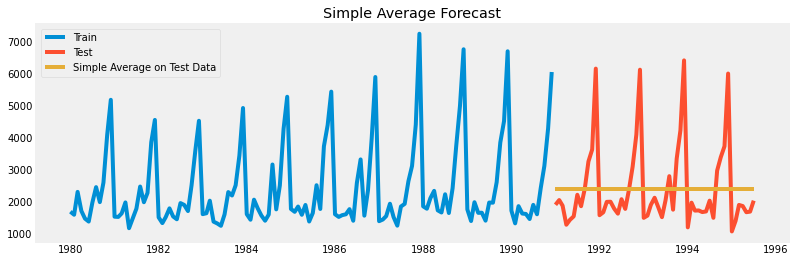

In [61]:
plt.figure(figsize=(12,4))
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

#### SA Model Evaluation

In [62]:
## Test Data - RMSE 

rmse_model3_test = metrics.mean_squared_error(Test['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 1275.082


In [63]:
# Comparing the RSMEs 
resultsDf_temp = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['Simple Average'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha=0.70,SES",1338.000861
"Alpha=.665,Beta=0.0001:DES",5291.879833
"Alpha=0.11,Beta=0.012,Gamma=0.460:TES",378.625883
"Alpha=0.111,Beta=0.0493,Gamma=0.362:TES",402.936179
RegressionOnTime,1275.867052
Naive Model,3864.279352
Simple Average,1275.081804


### Moving Average Forecast
The moving average is a statistical method used for forecasting long-term trends.The technique represents taking an average of a set of numbers in a given range while moving the range.
In simple terms, a moving average plot takes the average of several different points in the data set and then plots it over time.

Two main types of moving averages:
   1) Centered moving average - calculated as the average of raw observations at, before and after time, t.\
   2) Trailing moving average - uses historical observations and is used on time series forecasting.
   
The rolling() function on the Series Pandas object will automatically group observations into a window.


The main advantage of the moving average method is that it takes into account all previous values when predicting future values. This helps to reduce the effect of outliers when making predictions and also makes it easier to identify seasonal patterns in a time-series data set.
The moving average method is an effective tool for short-term forecasting due to its flexibility and ease of use. Its ability to take into account all past values when making predictions ensures accuracy while its ability to identify seasonal patterns means that it can be used effectively for long-term forecasting too

This algorithm helps us to forecast new observations based on a time series. This algorithm uses smoothing methods. The moving average algorithm is used only on time series that DOESN'T have a trend. This method is by far the easiest and it consists of making the arithmethic mean of the last ,,n'' observations contained by the time series to forecast the next observation. We use the following       
                
                formula:MA_(t+1)=(∑_(i=t-n)^t x_i )/n

We need to find the optimal number ,,n" of observation to be used in the forecast. We can find it by checking the square error mean of multiple ,,n'' observations. We should start at 3 observations and we can go up to half of the data set size + 1.

In [64]:
# Making copy of Test and test Data
MovingAverage = df.copy()

MovingAverage_train = Train.copy()
MovingAverage_test = Test.copy()
MovingAverage_train.head()

,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471


In [65]:
# Moving Average forecast
MovingAverage_test['moving_avg_forecast'] = df['Sparkling'].rolling(12).mean()
print(MovingAverage_test)

            Sparkling  moving_avg_forecast
YearMonth                                 
1991-01-01       1902          2429.916667
1991-02-01       2049          2490.583333
1991-03-01       1874          2491.833333
1991-04-01       1279          2462.750000
1991-05-01       1432          2447.500000
1991-06-01       1540          2454.416667
1991-07-01       2214          2480.666667
1991-08-01       1857          2501.666667
1991-09-01       2408          2500.333333
1991-10-01       3252          2511.666667
1991-11-01       3627          2456.750000
1991-12-01       6153          2465.583333
1992-01-01       1577          2438.500000
1992-02-01       1667          2406.666667
1992-03-01       1993          2416.583333
1992-04-01       1997          2476.416667
1992-05-01       1783          2505.666667
1992-06-01       1625          2512.750000
1992-07-01       2076          2501.250000
1992-08-01       1773          2494.250000
1992-09-01       2377          2491.666667
1992-10-01 

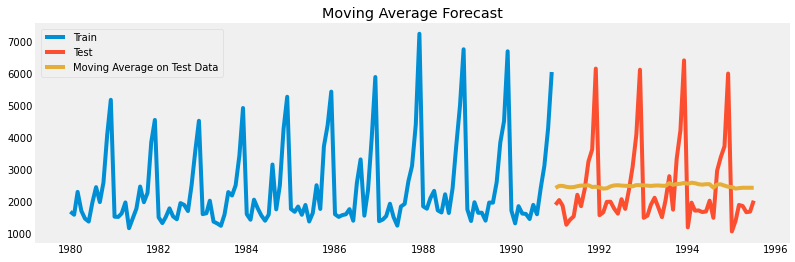

In [66]:
# Plotting The moving Avarage of Sparkling and forecast
plt.figure(figsize=(12,4))
MovingAverage_test['moving_avg_forecast'] = df['Sparkling'].rolling(12).mean()
plt.plot(MovingAverage_train['Sparkling'], label='Train')
plt.plot(MovingAverage_test['Sparkling'], label='Test')
plt.plot(MovingAverage_test['moving_avg_forecast'], label='Moving Average on Test Data')
plt.legend(loc='best')
plt.title("Moving Average Forecast")
plt.grid();

In [67]:
## Test Data - RMSE 
rmse_model4_test = metrics.mean_squared_error(Test['Sparkling'],MovingAverage_test['moving_avg_forecast'],squared=False)
print("For Moving  Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Moving  Average forecast on the Test Data,  RMSE is 1275.082


In [68]:
# Comparing the RSMEs 
resultsDf_temp = pd.DataFrame({'Test RMSE': [rmse_model4_test]},index=['Moving Average'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha=0.70,SES",1338.000861
"Alpha=.665,Beta=0.0001:DES",5291.879833
"Alpha=0.11,Beta=0.012,Gamma=0.460:TES",378.625883
"Alpha=0.111,Beta=0.0493,Gamma=0.362:TES",402.936179
RegressionOnTime,1275.867052
Naive Model,3864.279352
Simple Average,1275.081804
Moving Average,1267.925330


#### Trailing Moving Average

In [69]:
# Trailing Moving Avarage by loop
window_sizes = [2, 4, 6, 9]
for window_size in window_sizes:
    column_name = f'Trailing_{window_size}'
    MovingAverage[column_name] = MovingAverage['Sparkling'].rolling(window_size).mean()

In [70]:
#Printing MA
(print(MovingAverage),3)

            Sparkling  Trailing_2  Trailing_4   Trailing_6   Trailing_9
YearMonth                                                              
1980-01-01       1686         NaN         NaN          NaN          NaN
1980-02-01       1591      1638.5         NaN          NaN          NaN
1980-03-01       2304      1947.5         NaN          NaN          NaN
1980-04-01       1712      2008.0     1823.25          NaN          NaN
1980-05-01       1471      1591.5     1769.50          NaN          NaN
...               ...         ...         ...          ...          ...
1995-03-01       1897      1649.5     2592.00  2913.666667  2664.000000
1995-04-01       1862      1879.5     1557.75  2659.833333  2645.222222
1995-05-01       1670      1766.0     1707.75  2316.666667  2664.666667
1995-06-01       1688      1679.0     1779.25  1598.166667  2522.444444
1995-07-01       2031      1859.5     1812.75  1758.333333  2372.000000

[187 rows x 5 columns]


(None, 3)

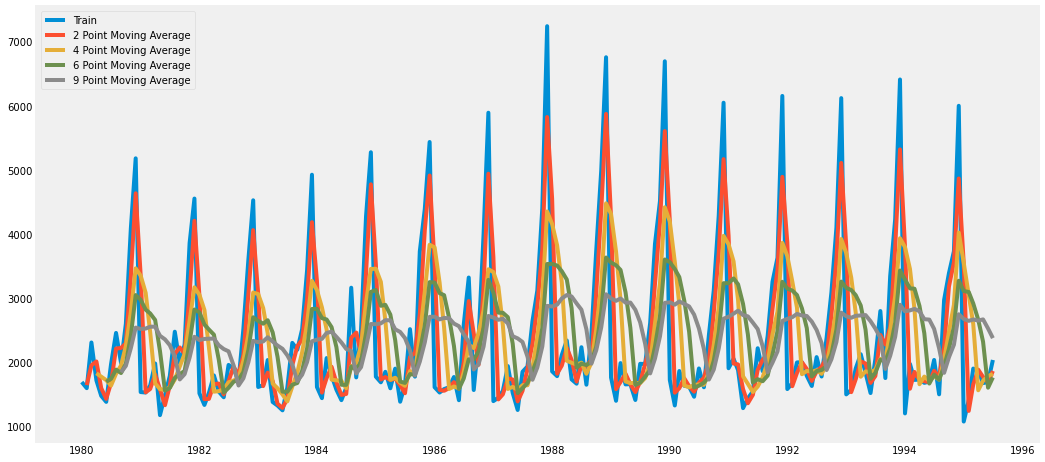

In [71]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Sparkling'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [72]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[df.index.year < 1991]
trailing_MovingAverage_test=MovingAverage[df.index.year >= 1991]


#Train = df[df.index.year < 1991]
#Test = df[df.index.year >= 1991]

In [73]:
print(trailing_MovingAverage_train['Trailing_2'].iloc[-1])
print(trailing_MovingAverage_test['Trailing_2'].iloc[-1])

5166.5
1859.5


In [74]:
# Checking last 5 value of trailing 2
trailing_MovingAverage_train['Trailing_2'].tail()

YearMonth
1990-08-01    1752.0
1990-09-01    2014.5
1990-10-01    2770.0
1990-11-01    3701.0
1990-12-01    5166.5
Name: Trailing_2, dtype: float64

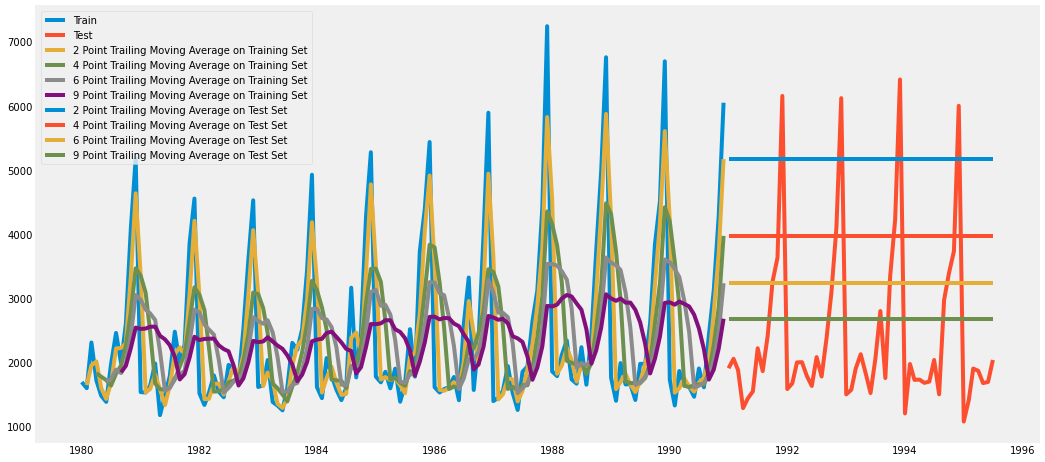

In [75]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

trailing_MovingAverage_test['Trailing_2'] = trailing_MovingAverage_train['Trailing_2'].iloc[-1]
trailing_MovingAverage_test['Trailing_4'] = trailing_MovingAverage_train['Trailing_4'].iloc[-1]
trailing_MovingAverage_test['Trailing_6'] = trailing_MovingAverage_train['Trailing_6'].iloc[-1]
trailing_MovingAverage_test['Trailing_9'] = trailing_MovingAverage_train['Trailing_9'].iloc[-1]

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

#### TMA Model Evaluation

In [76]:
# Model Evaluation on Test Data
## Test Data - RMSE --> 2 point Trailing MA
#rmse = math.sqrt(((MovingAverage['Sparkling'] - MovingAverage[column_name]) ** 2).mean())

rmse_model5_test_2 = metrics.mean_squared_error(Test['Sparkling'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model5_test_2))

## Test Data - RMSE  --> 4 point Trailing MA

rmse_model6_test_4 = metrics.mean_squared_error(Test['Sparkling'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model6_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model7_test_6 = metrics.mean_squared_error(Test['Sparkling'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model7_test_6))

## Test Data - RMSE  --> 9 point Trailing MA

rmse_model8_test_9 = metrics.mean_squared_error(Test['Sparkling'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f " %(rmse_model8_test_9))

For 2 point Moving Average Model forecast on the Test Data,  RMSE is 3046.976
For 4 point Moving Average Model forecast on the Test Data,  RMSE is 2021.856
For 6 point Moving Average Model forecast on the Test Data,  RMSE is 1521.611
For 9 point Moving Average Model forecast on the Test Data,  RMSE is 1304.619 


#### Inference:
1.For the MA model the RMSE is lowest at  9 point, The Moving Average Model forecast  RMSE is 1304.619 .\
2.Which still higher than the other TES models.

In [77]:
# Comparision of Models on RMSE
resultsDf_temp = pd.DataFrame({'Test RMSE': [rmse_model5_test_2,rmse_model6_test_4
                                          ,rmse_model7_test_6,rmse_model8_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha=0.70,SES",1338.000861
"Alpha=.665,Beta=0.0001:DES",5291.879833
"Alpha=0.11,Beta=0.012,Gamma=0.460:TES",378.625883
"Alpha=0.111,Beta=0.0493,Gamma=0.362:TES",402.936179
RegressionOnTime,1275.867052
Naive Model,3864.279352
Simple Average,1275.081804
Moving Average,1267.925330
2pointTrailingMovingAverage,3046.976092
4pointTrailingMovingAverage,2021.855880


### Q5.Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment.

### Checking  for stationarity of the whole Time Series data.
### Stationarity
A stationary time series is one whose statistical properties such as mean, variance, autocorrelation, etc. are all constant over time.

Stationarity means that the autocorrelation of lag ‘k’ depends on k, but not on time t.

Let Xt denote the time series at time t.

Autocorrelation of lag k is the correlation between Xt and X(t−k) </font>

Strong stationarity: is a stochastic process whose unconditional joint probability distribution does not change when shifted in time. Consequently, parameters such as mean and variance also do not change over time.\
Weak stationarity: is a process where mean, variance, autocorrelation are constant throughout the time
Stationarity is important as non-stationary series that depend on time have too many parameters to account for when modelling the time series. diff() method can easily convert a non-stationary series to a stationary series.

We will try to decompose seasonal component of the above decomposed time series.

### Check for Stationarity

There are multiple tests that can be used to check stationarity.

     ADF( Augmented Dicky Fuller Test)
     KPSS
     PP (Phillips-Perron test)
Let's just perform the ADF which is the most commonly used one

Dickey-Fuller Test - Dicky Fuller Test on the timeseries is run to check for stationarity of data.
##### Hypothesis
Null Hypothesis H0: Time Series is non-stationary.\
Alternate Hypothesis Ha: Time Series is stationary.

So Ideally if p-value < 0.05 then null hypothesis: TS is non-stationary is rejected else the TS is non-stationary is failed to be rejected .



In [78]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=9).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=9).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

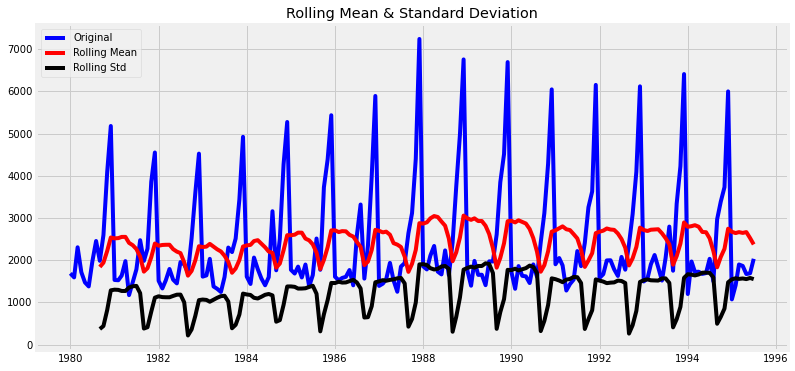

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [79]:
test_stationarity(df['Sparkling'])

#### Insight: 
The p-value 0.60 is very large, and not smaller than 0.05 and thus we fail to challenge the Null hypothesis so the TS data of Sparkling is not a stationary in nature.


#### Making a Time Series Stationary by - Differencing 'd'
Differencing 'd' is done on a non-stationary time series data one or more times to convert it into stationary.
(d=1) 1st order differencing is done where the difference between the current and previous (1 lag before) series is taken and then checked for stationarity using the ADF(Augmented Dicky Fueller) test. If differenced time series is stationary, we proceed with AR modeling. Else we do (d=2) 2nd order differencing, and this process repeats till we get a stationary time series

1st order differencing equation is : yt=yt−yt−1 \
2nd order differencing equation is : yt=(yt−yt−1)−(yt−1−yt−2)
 and so on…</font> \
The variance of a time series may also not be the same over time. To remove this kind of non-stationarity, we can transform the data. If the variance is increasing over time, then a log transformation can stabilize the variance.

Let us take a difference of order 1 and check whether the Time Series is stationary or not.

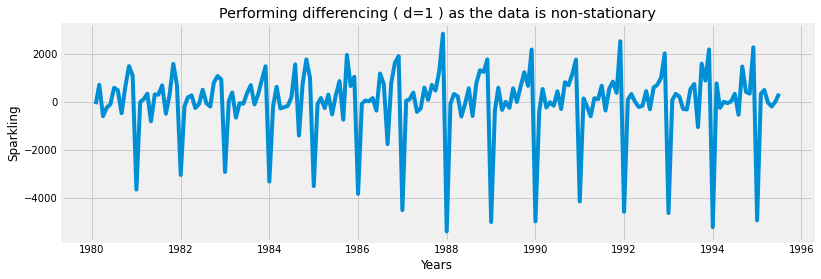

In [80]:
#Performing differencing ( d=1 ) as the data is non-stationary
plt.figure(figsize=(12, 4))
plt.plot(df['Sparkling'].diff(periods=1))
plt.xlabel('Years')
plt.ylabel('Sparkling')
plt.title('Performing differencing ( d=1 ) as the data is non-stationary');

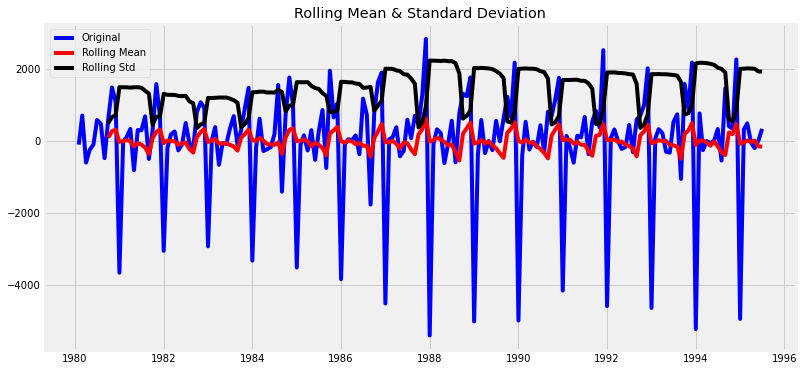

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [81]:
#Performing differencing ( d=1 ) as the data is non-stationary
test_stationarity(df['Sparkling'].diff().dropna())

Now, We can see that at  𝛼= 0.05 the Time Series is indeed stationary.

#### Plot the Autocorrelation function plots on the whole data.

In [82]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

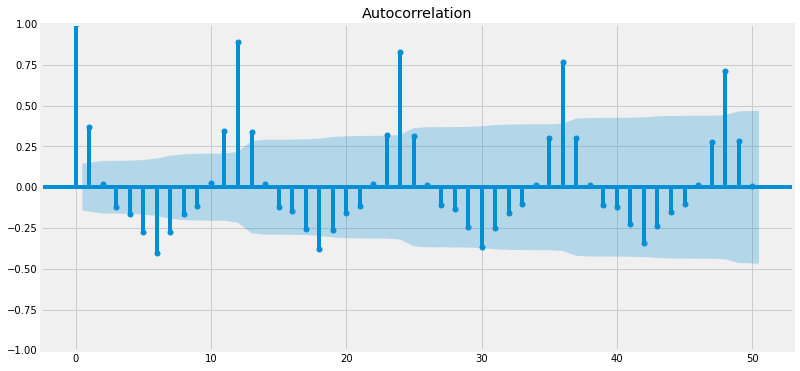

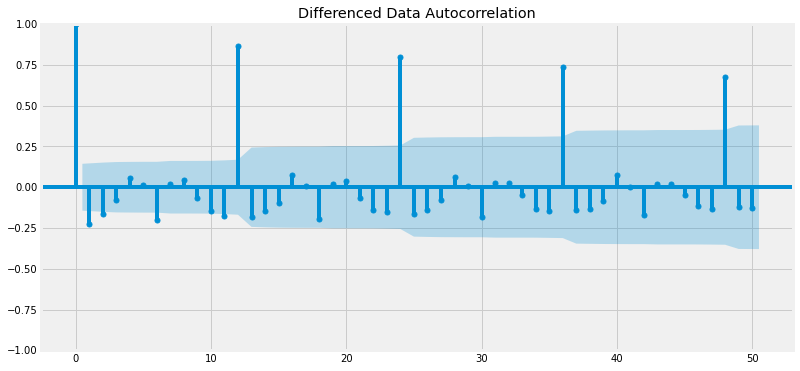

In [83]:
plot_acf(df['Sparkling'],lags=50)
plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

### QN 6 Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

### Auto Regressive(AR) Models
Autoregression means regression of a variable on itself which means Autoregressive models use previous time period values to predict the current time period values.     
An autoregressive (AR) model is a representation of a type of random process; as such, it is used to describe certain time-varying processes in nature, economics, etc\
The autoregressive model specifies that the output variable depends linearly on its own previous values and on a stochastic term (an imperfectly predictable term); thus the model is in the form of a stochastic difference equation.\

One of the fundamental assumptions of an AR model is that the time series is assumed to be a stationary process.
An AR(p) model (Auto-Regressive model of order p) can be written as:

     yt =   φ1yt−1+φ2yt−2+……+φpyt−p+εt
     
εt is an error term which is an independent and identically distributed random variable (or in other words, a white noise) with the parameters mean = 0 and standard deviation = σ\
The φ are regression coefficients multiplied by lagged time series variable, which captures the effect of the input variable on the output, provided intermediate values do not change.


### Choose the order 'p' of AR model
  We look at the Partial Autocorrelations of a stationary Time Series to understand the order of Auto-Regressive models.
  For an AR model, 2 ways to identify order of 'p':
1) **PACF Approach** : the PACF method where the (Partial Auto Correlation Function) values cut off and become zero after a certain lag. PACF vanishes if there is no regression coefficient that far back. The cut-off value where this happens can be taken as the order of AR as ‘p’. This can be seen from a PACF plot.

If the 2nd PACF vanishes (cut off in PACF) then the 2nd coefficient is not considered and thus ‘p’ is 1.\
If the 3rd PACF vanishes (cuts off in PACF) then the 3rd coefficient is not considered and thus ‘p’ is 2 and so on…\
Partial Autocorrelation of order 2 = Partial autocorrelation of lag 2 = Correlation between Xt and Xt−2 holding Xt−1 fixed.\
2) **Lowest AIC Approach** : **the lowest Akaike Information Criteria (AIC) value compared among different orders of ‘p’ is considered.**

### Moving Average(MA) Models
Moving average model considers past residual values to predict the current time period values. These past residuals are past prediction errors.
For a MA model, the residual or error component is modeled.
The moving average model MA(q) of  order q can be represented as:

        yt=εt+θ1εt−1+……+θqεt−q
        
Where yt time series variable, θ are numeric coefficients multiplied to lagged residuals and ε is the residual term considered as a purely random process with mean 0, variance σ2 and  Cov(εt−1,εt−q)= 0.


### Choose the order 'q' of MA model
We look at the Autocorrelations of a stationary Time Series to understand the order of Moving Average models.
For a MA model,
1) **ACF Approach** : ACF (Autocorrelation Function) values cut off at a certain lag. ACF vanishes, and there are no coefficients that far back; thus, the cut-off value where this happens is taken as the order of MA as ‘q’. This can be seen from the ACF plot.

2) **Lowest AIC Approach** : the lowest Akaike Information Criteria (AIC) value compared among different orders of ‘q’ is considered. 

#### Using the log transformed series as there is variance in the data

In [84]:
Train_log = np.log10(Train['Sparkling'])
#Log transformation on the training data to make the time series stationary as we 

In [85]:
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

### ARIMA models
Auto Regressive Integrated Moving Average is a way of modeling time series data for forecasting or predicting future data point
An autoregressive integrated moving average (ARIMA) model is a generalization of an autoregressive moving average (ARMA) model. Both of these models are fitted to time series data either to better understand the data or to predict future points in the series (forecasting). ARIMA models are applied in some cases where data show evidence of non-stationarity, where an initial differencing step (corresponding to the "integrated" part of the model) can be applied one or more times to eliminate the non-stationarity. ARIMA model is of the form: ARIMA(p,d,q): p is AR parameter, d is differential parameter, q is MA parameter

ARIMA(1,0,0)

        yt = a1yt-1 + ϵt

ARIMA(1,0,1)

       yt = a1yt-1 + ϵt + b1ϵt-1

ARIMA(1,1,1)

       Δyt = a1Δyt-1 + ϵt + b1ϵt-1 where Δyt = yt - yt-1
 
Improving AR Models by making Time Series stationary through Moving AVerage Forecasts\
ARIMA models consist of 3 components:-\
AR model: The data is modeled based on past observations.\
Integrated component: Whether the data needs to be differenced/transformed.\
MA model: Previous forecast errors are incorporated into the model.

### Building an Automated version of an ARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC)

In [86]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [87]:
#AR Model building to estimate best 'p' ( Lowest AIC Approach )
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [88]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(Train['Sparkling'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:2267.6630357855465
ARIMA(0, 1, 1) - AIC:2263.0600155918555
ARIMA(0, 1, 2) - AIC:2234.408323131469
ARIMA(1, 1, 0) - AIC:2266.6085393190097
ARIMA(1, 1, 1) - AIC:2235.7550946707897
ARIMA(1, 1, 2) - AIC:2234.5272004520434
ARIMA(2, 1, 0) - AIC:2260.36574396809
ARIMA(2, 1, 1) - AIC:2233.7776262944917
ARIMA(2, 1, 2) - AIC:2213.5092144007594


In [89]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
8,"(2, 1, 2)",2213.509214
7,"(2, 1, 1)",2233.777626
2,"(0, 1, 2)",2234.408323
5,"(1, 1, 2)",2234.527200
4,"(1, 1, 1)",2235.755095
6,"(2, 1, 0)",2260.365744
1,"(0, 1, 1)",2263.060016
3,"(1, 1, 0)",2266.608539
0,"(0, 1, 0)",2267.663036


In [90]:
# ARIMA Summary
auto_ARIMA = ARIMA(Train['Sparkling'], order=(2,1,2))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1101.755
Date:                Sun, 09 Apr 2023   AIC                           2213.509
Time:                        16:11:11   BIC                           2227.885
Sample:                    01-01-1980   HQIC                          2219.351
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3121      0.046     28.775      0.000       1.223       1.401
ar.L2         -0.5593      0.072     -7.738      0.000      -0.701      -0.418
ma.L1         -1.9917      0.109    -18.212      0.0

#### Predicting  on the Test Set using this model and evaluate the model

In [91]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(Test))

In [92]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(Test['Sparkling'],predicted_auto_ARIMA,squared=False)
print(rmse)

1299.9792795539977


In [93]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['ARIMA(2,1,2)'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha=0.70,SES",1338.000861
"Alpha=.665,Beta=0.0001:DES",5291.879833
"Alpha=0.11,Beta=0.012,Gamma=0.460:TES",378.625883
"Alpha=0.111,Beta=0.0493,Gamma=0.362:TES",402.936179
RegressionOnTime,1275.867052
Naive Model,3864.279352
Simple Average,1275.081804
Moving Average,1267.925330
2pointTrailingMovingAverage,3046.976092
4pointTrailingMovingAverage,2021.855880


#### Inferences:
Criteria to choose the best fit model is the lowest/minimum AIC value For ARIMA(p, d, q) we got (2, 1, 2),model with the least AIC of 1299.97.

Here,\

p = non-seasonal AR order = 2, \
d = non-seasonal differencing = 1,\
q = non-seasonal MA order = 2,

S = time span of repeating seasonal pattern = 12\
The ARIMA model with order 2,1,2 has AIC of 1299.97.50 which is pretty higher than few models. 

### Building an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC)

#### SAMRIMA Model

SARIMA stands for Seasonal Autoregressive Integrated Moving Average. It is a statistical analysis model that uses time-series data to either better understand the data set or to predict future trends. SARIMA is an extension of ARIMA (Autoregressive Integrated Moving Average) model and is used when the time series data has seasonal frequency yet also by non-seasonal differencing in Univariate data. 
It adds three new hyperparameters to specify the autoregression (AR), differencing (I) and moving average (MA) for the seasonal component of the series, as well as an additional parameter for the period of the seasonality.

A typical SARIMA model equation looks like the following –

SARIMA(p,d,q)x(P,D,Q)lag

The parameters for these types of models are as follows:

        p and seasonal P: indicate the number of AR terms (lags of the stationary series)
        d and seasonal D: indicate differencing that must be done to stationary series
        q and seasonal Q: indicate the number of MA terms (lags of the forecast errors)
        lag: indicates the seasonal length in the data

Seasonality S(P, D, Q, s), where s is simply the season’s length. This component requires the parameters P and Q which are the same as p and q, but for the seasonal component. Finally, D is the order of seasonal integration representing the number of differences required to remove seasonality from the series.

Combining all, we get the SARIMA (p, d, q)(P, D, Q, s) model.

Let us look at the ACF plot once more to understand the seasonal parameter for the SARIMA model.

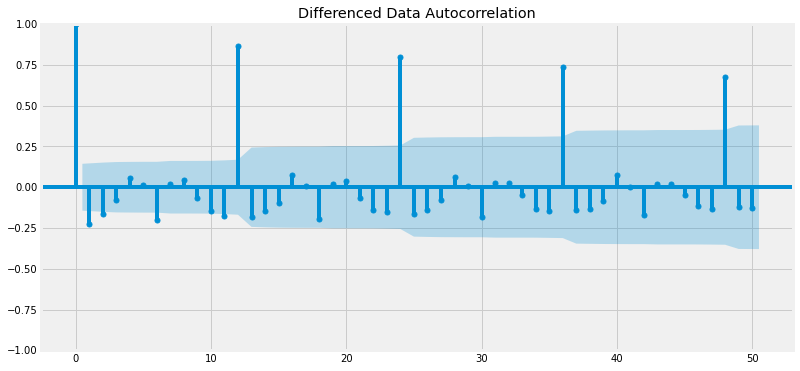

In [94]:
plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

####  Insight :
We see that there can be a seasonality at 12. But from the decompostion at the start we ascertained that visually it looks like the seasonality =12 and thus using the same 

#### Setting the seasonality as 6 to estimate parametrs using auto SARIMA model.

In [95]:
# Seasonality as 12 to estimate parametrs using auto SARIMA mode
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [96]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [97]:
# Generating the best combination using param
for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(Train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1956.2614616844364
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1723.1533640236448
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1837.436602245668
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1806.9905301390017
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1633.2108735791846
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1648.3776153470858
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1647.2054158606877
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1630.9898053920788
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:2230.1629078505816
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1923.7688649566758
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:1692.7089573339308
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1797.1795881837988
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1738.0903193747092
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:1570.1509144564425
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:1605.6751954178712
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:1599.2245084872488
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:1570.4018822862124
SARIMA(0, 1

In [98]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
50,"(1, 1, 2)","(1, 0, 2, 12)",1555.584248
53,"(1, 1, 2)","(2, 0, 2, 12)",1555.934568
26,"(0, 1, 2)","(2, 0, 2, 12)",1557.121563
23,"(0, 1, 2)","(1, 0, 2, 12)",1557.160507
77,"(2, 1, 2)","(1, 0, 2, 12)",1557.340404


In [99]:
# Generating Summary of SARIMA
auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(Train['Sparkling'].values,
                                order=(1, 1, 2),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(1, 0, 2, 12)   Log Likelihood                -770.792
Date:                            Sun, 09 Apr 2023   AIC                           1555.584
Time:                                    16:13:19   BIC                           1574.095
Sample:                                         0   HQIC                          1563.083
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6281      0.255     -2.463      0.014      -1.128      -0.128
ma.L1         -0.1041      0.225   

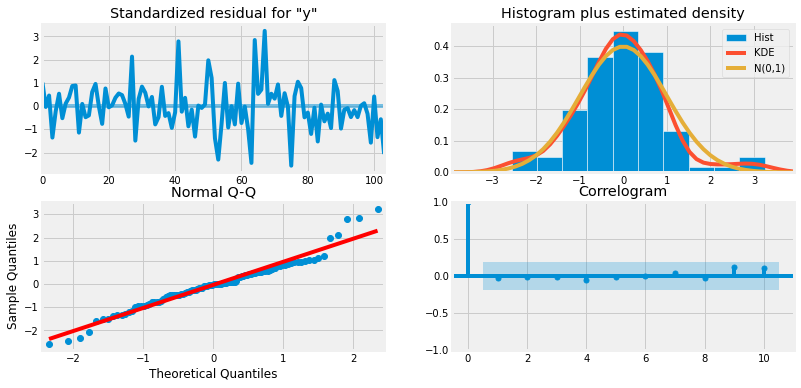

In [100]:
#Plotting the assumption on Residuals
results_auto_SARIMA_12.plot_diagnostics()
plt.show()

#### Predict on the Test Set using this model and evaluate the model.

In [101]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(Test))

In [102]:
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,1327.356639,388.344284,566.215828,2088.497449
1,1315.107471,402.012226,527.177986,2103.036955
2,1621.581317,402.005826,833.664377,2409.498256
3,1598.852273,407.244684,800.667360,2397.037186
4,1392.680152,407.975275,593.063307,2192.296997


In [103]:
# RSME value on Test data
rmse = mean_squared_error(Test['Sparkling'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
print(rmse)

528.6063958242969


In [104]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['SARIMA(1,1,2)(1,0,2,12)'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha=0.70,SES",1338.000861
"Alpha=.665,Beta=0.0001:DES",5291.879833
"Alpha=0.11,Beta=0.012,Gamma=0.460:TES",378.625883
"Alpha=0.111,Beta=0.0493,Gamma=0.362:TES",402.936179
RegressionOnTime,1275.867052
Naive Model,3864.279352
Simple Average,1275.081804
Moving Average,1267.925330
2pointTrailingMovingAverage,3046.976092
4pointTrailingMovingAverage,2021.855880


#### Inferences: 
Criteria to choose the best fit model is the lowest/minimum AIC value
For ARIMA(p, d, q) × (P, D, Q)S, we got SARIMAX(1, 1, 2)x(1, 0, 2, 12)model with the least AIC of 1555.58248

Here,

    p = non-seasonal AR order = 1,
    d = non-seasonal differencing = 1,
    q = non-seasonal MA order = 2,
    P = seasonal AR order = 1,
    D = seasonal differencing = 0,
    Q = seasonal MA order = 2,
    S = time span of repeating seasonal pattern = 12
    
From the model diagnostics plot, we can see that all the individual diagnostics plots almost follow the theoretical numbers and thus we cannot develop any pattern from these plots. 
In SARIMA model we fail to reject the null hypothesis because some p values are above the 0.05 in ma.L1 and ma.S.L24.
RMSE wise its stand next to TES.

#### Building the most optimum model on the Full Data.

In [105]:
full_data_model = sm.tsa.statespace.SARIMAX(df['Sparkling'],
                                order=(1,1,2),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                          Sparkling   No. Observations:                  187
Model:             SARIMAX(1, 1, 2)x(1, 0, 2, 12)   Log Likelihood               -1173.413
Date:                            Sun, 09 Apr 2023   AIC                           2360.827
Time:                                    16:13:25   BIC                           2382.309
Sample:                                01-01-1980   HQIC                          2369.551
                                     - 07-01-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6609      0.242     -2.733      0.006      -1.135      -0.187
ma.L1         -0.2740      0.200   

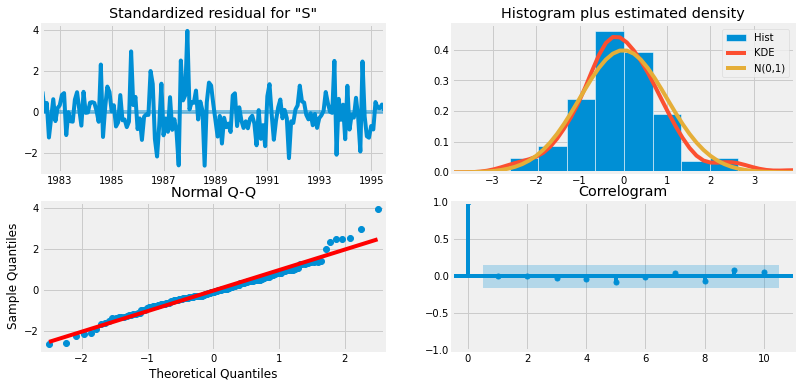

In [106]:
# plotting the residual assumptions on SARIMA full data model
results_full_data_model.plot_diagnostics();

#### Inference:
In this case, our model diagnostics suggests that the model residuals are normally distributed based on the following:

1.The KDE plot of the residuals on the top right is almost similar with the normal distribution.\
2.The Q-Q-plot on the bottom left shows that the ordered distribution of residuals (blue dots) follows the linear trend of the samples taken from a standard normal distribution with N(0, 1). Again, this is a strong indication that the residuals are normally distributed.\
3.The residuals over time (top left plot) don't display any obvious seasonality and appear to be white noise. This is confirmed by the autocorrelation (i.e. correlogram) plot on the bottom right, which shows that the time series residuals have low correlation with lagged versions of itself.\
4.Those observations coupled with the fact that there are no spikes outside the insignificant zone for both ACF and PACF plots lead us to conclude that that residuals are random with no information or juice in them and our model produces a satisfactory fit that could help us understand our time series data and forecast future values. 

It seems that our ARIMA model is working fine.

### Evaluate the model on the whole and predict 12 months into the future
Time Series Assumptions 
Table of Contents

Some of the most common assumptions made for time series are based on the common sense. But always Keep in mind one thing

Very long range forecasts does not work well !!

1.Forecast is done by keeping in mind that the market and the other conditions are not going to change in the future.\
2.There will be not any change in the market.\
3.But the change is gradual and not a drastic change.\
4.Situations like recession in 2008 US market will send the forecasts into a tizzy.\
5.Events like demonetization would throw the forecasts into disarray Based on the data available ,\
 we should not try to forecast for more than a few periods ahead.

### Building the most optimum model on the Full Data.
We have used the number of methods to get the model having minimum RMSE.In This on the basis of RSME table we find Triple Exponential Smoothining Modeling is perfect for this solution with the Triple Exponential Smoothing with multiplicative seasonality with the following parameters: 
 
            𝛼 = 0.11, 
            𝛽 = 0.12 and 
            𝛾  = 0.460
            

In [107]:
#Ruuning Model on Full dataset
fullmodel1 = ExponentialSmoothing(df,
                                  trend='additive',
                                  seasonal='multiplicative').fit(smoothing_level= 0.11127217693511166,
                                                                 smoothing_trend=0.012360783126182025,
                                                                 smoothing_seasonal=0.4607177659431463)

In [108]:
RMSE_fullmodel1 = metrics.mean_squared_error(df['Sparkling'],fullmodel1.fittedvalues,squared=False)

print('RMSE of the TES Full Model',RMSE_fullmodel1)

RMSE of the TES Full Model 356.9910609869544


In [109]:
# Getting the predictions for the same number of times stamps that are present in the test data
prediction_1 = fullmodel1.forecast(steps=12)

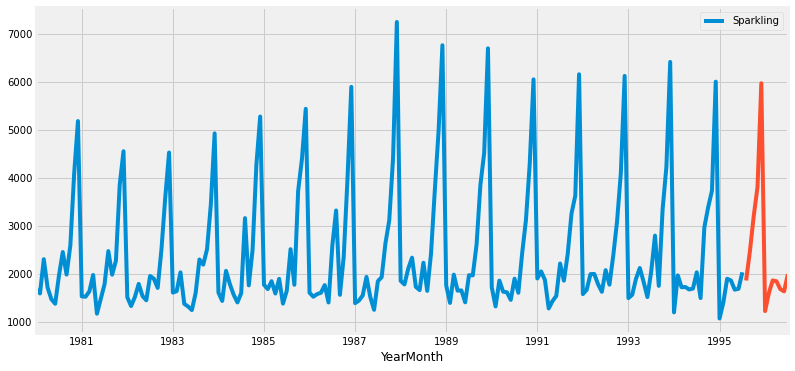

In [110]:
#Plotting the forecast
df.plot()
prediction_1.plot();

One assumption that we have made over here while calculating the confidence bands is that the standard deviation of the forecast distribution is almost equal to the residual standard deviation.

In [111]:
np.std(fullmodel1.resid,ddof=1)

357.91334919948673

In [112]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#Here we are taking the multiplier to be 1.96 as we want to plot with respect to a 95% confidence intervals.
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - 1.96*np.std(fullmodel1.resid,ddof=1),
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + 1.96*np.std(fullmodel1.resid,ddof=1)})
pred_1_df.head()

,lower_CI,prediction,upper_ci
1995-08-01,1159.064911,1860.575075,2562.085240
1995-09-01,1768.945346,2470.455510,3171.965675
1995-10-01,2497.912104,3199.422268,3900.932432
1995-11-01,3104.277507,3805.787671,4507.297835
1995-12-01,5264.864501,5966.374666,6667.884830


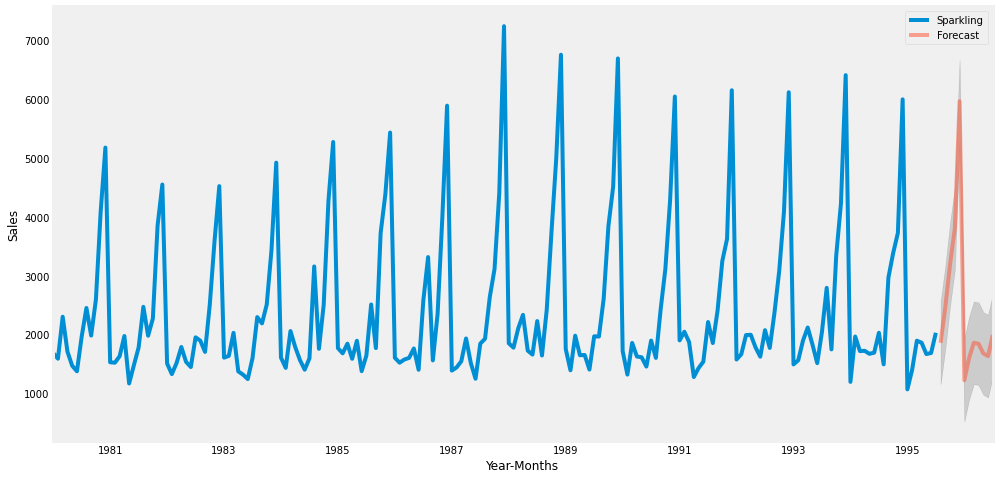

In [113]:
# plot the forecast along with the confidence band

axis = df.plot(label='Actual', figsize=(15,8))
pred_1_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_1_df.index, pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.grid()
plt.show()

In [114]:
# Calculate the RMSE on Full Data
resultsDf_temp = pd.DataFrame({'Test RMSE': [RMSE_fullmodel1]}
                           ,index=['RMSE of the TES Full Model'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha=0.70,SES",1338.000861
"Alpha=.665,Beta=0.0001:DES",5291.879833
"Alpha=0.11,Beta=0.012,Gamma=0.460:TES",378.625883
"Alpha=0.111,Beta=0.0493,Gamma=0.362:TES",402.936179
RegressionOnTime,1275.867052
Naive Model,3864.279352
Simple Average,1275.081804
Moving Average,1267.925330
2pointTrailingMovingAverage,3046.976092
4pointTrailingMovingAverage,2021.855880


#### Inferences:
TES stands as best model to determine a good forecast on the full Sparkling TS dataset.356.99 is the RMSE in on th full dataset.Which is lower than the most of training and test models performed here.\
CI Intervals : The lower_CI and upper_CI columns represent the lower and upper bounds of the confidence interval for the prediction column respectively. A confidence interval is a range of values that we can be confident contains the true population parameter with a certain degree of certainty. Our case we have considered the confidence level is 95%.Which is plotted as well.\

So, for example, if we take the first row of your data (1995-08-01), we can say that we are 95% confident that the true value of prediction lies between 1159.064911 and 2562.085240.


### QN-8 Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [115]:
# Generating the RSME summary tables on basis on all models
resultsDf

,Test RMSE
"Alpha=0.70,SES",1338.000861
"Alpha=.665,Beta=0.0001:DES",5291.879833
"Alpha=0.11,Beta=0.012,Gamma=0.460:TES",378.625883
"Alpha=0.111,Beta=0.0493,Gamma=0.362:TES",402.936179
RegressionOnTime,1275.867052
Naive Model,3864.279352
Simple Average,1275.081804
Moving Average,1267.925330
2pointTrailingMovingAverage,3046.976092
4pointTrailingMovingAverage,2021.855880


In [116]:
#Sorting the RMSE Values in Descending Order
resultsDf.sort_values(by=['Test RMSE'])

,Test RMSE
RMSE of the TES Full Model,356.991061
"Alpha=0.11,Beta=0.012,Gamma=0.460:TES",378.625883
"Alpha=0.111,Beta=0.0493,Gamma=0.362:TES",402.936179
"SARIMA(1,1,2)(1,0,2,12)",528.606396
Moving Average,1267.925330
Simple Average,1275.081804
RegressionOnTime,1275.867052
"ARIMA(2,1,2)",1299.979280
9pointTrailingMovingAverage,1304.618912
"Alpha=0.70,SES",1338.000861


##### Insights:
1.The TES model on full dataset is having the lowest RMSE(356.99) Value with parameter Alpha=0.11,Beta=0.012,Gamma=0.460.\
2.While the highest RMSE(2562.085240) value is outcome of DES Model with parameter Alpha=.665,Beta=0.0001.

### QN 9 Please explain and summarise the various steps performed in this project. There should be proper business interpretation and actionable insights present.(for Both Sparkling and Rose TS datset)

1.The three fundamental steps to model a time series are building a model for time series, validating the model and using the model to forecast future values/impute missing values.\
2.The first step in time series modeling is to  read the data ,account for existing seasons (a recurring pattern over a given period of time) and trends (upward or downward movement in the data). Accounting for these embedded patterns is what we call making the data stationary.

         Steps:
            a.Collecting the data and cleaning it
            b.Preparing Visualization with respect to time vs key feature
            c.Normal check of data shape,data Information,Description and plot (Yearly and Monthly),Missing values
            d.Performed and plot Decomposition by both additive and multiplicative methodes and log transformed.\
            e.Compared the normal plot with log plot
            f.Identified the patterns in time series data
            
3.Check for stationary of data and make it stationary by prescribe common method.Once the data is stationary, the next step is modeling  to establish a base level forecast. This can be done using various techniques such as exponential smoothing methods as Simple, Double and Triple exponential(moving average),Linear regression, Naive Model,Simple Average,Moving average.

4.For the modeling of  ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data.Considered the best param combination to get the lowest RMSE.

            a.Data brakeup into Train and test as per desired year
            b.All types of Exponential methods performed 
            c.Tuned the models on hypermeter by Param search
            d.Hyperparameters:
                Alpha: Smoothing factor for the level.
                Beta: Smoothing factor for the trend.
                Gamma: Smoothing factor for the seasonality.
                Trend Type: Additive or multiplicative.
                Dampen Type: Additive or multiplicative.
                Phi: Damping coefficient.
                Seasonality Type: Additive or multiplicative.
                Period: Time steps in seasonal period.
             e.Performed the Models and Evaluate them individually and plotting
                ARIMA and SARIMA model performed on low AIC value
                Uses the combination parameter to get the best combination 
                Improving AR Models by making Time Series stationary through Moving AVerage Forecasts
                ARIMA models consist of 3 components:-
                AR model: The data is modeled based on past observations.
                Integrated component: Whether the data needs to be differenced/transformed.
                MA model: Previous forecast errors are incorporated into the model.
                for SARIMA, we first need to define a few parameters and a range of values for other parameters to generate
                a list of all possible combinations of p, q, d, P, Q, D, s.
                we get the SARIMA (p, d, q)(P, D, Q, s) model.
5.The final step in modeling is evaluating model accuracy. This has been done by using various statistical measures  root mean squared error (RMSE).Generated a table of RMSE for the whole modeling outcome and sorted out in descending order to get the lowest RMSE value at top.    
6.Than Run the best model on test data set thanon the whole dataset to predict 12 months into the future (till the end of next year) as desired.


### Business Interpretations oand Actionable Insights
#### Business Interpretations of Sparkling
1.In Yearly Box plot there is not fix growth and degrowth trend where as trend can be observed while in Monthly sales analysis by plotting the data and the Seasonality can be seen clearly.\
2.There are sharp increase in sale from month of August every year which touches the peak in December. While the sales peak is in month of December, which might be due to Holidays,some strong festival and new year celebration.\
3.We can also observe a bit jump in sales in month of March and April the actual reaslon not mentioned in data record.\
4.Month June can be considered as poor month in year for Sparkling sales view point.\
5.As per sales perspective the minimum sales was in year 1983 was less than 2000 while the highest sales are recorded in year 1988 Dec.\
6.After 1983 there was increasing trend where as sales has started shooting from 1987 which cannot be accidental.

#### Business Interpretations of Rose
1.In Yearly Box plot there is degrowth trend where as trend can be observed while in Monthly sales analysis by plotting the data and the Seasonality can be seen clearly.\
2.There are normal increase in sale in month of August every year and hiting the peak in month of December.
3.We can also observe lowest sales in Month January and a little jump in sales in month of March and dip in April the actual reason of fluctuation in sales has not mentioned in data record.\
4.The Rose wine is showing continuos downward trend in sales through out the time period.After year 1988 the sales are in sharp decline trend which is cause of worry and need adress immediatly.
5.The Rose sales are going down year by year this means the brand has not having a minimum loyal customer base.

##### Over all Actionable Insights

A.For this we have to go through the factors apart from data prevailing in market, like Competition, Demand Trend, Pricing,       Lucrative Schemes.\
B.As per data modeling and projecion the Sparkling sales will not going to record the degrowth in sales but not showing the       healthy growth too.\
C.Company have to find the actual factor(s) behind this sales jump from 1987 and sales dip of June 1983.\
D.Company should analyse the physical market condtions of 1987 to 1988, because that was neither their entrance period nor
their stage of wrapping up.\
E.Market survey and competiter pricing or other relevent lever has to find to use to incorporate in planning. These are not insight of analysis but there was a trend for two year which should be analysed or added for further forecast.\
F.In year 1988 both brands(Sparkling and Rose) has generated good number of sales,but after 1988 the Rose decline and in case of Sparkling after 1990 sales has showing the good increasing trend.\
G.After analysis of Both the brand it can be infer as company is supporting more to brand Sparkling more than Rose.Which may be one of reason for continuos downward trend.\
H.Need to analyse the not picking of seasonal sales from Aug to Dec in every year of Rose as per Sparkling pattern.\
I.The forecast has been shared for the both brand on the basis of past data modeling.Best Model suggesting that next 12 month sales are on growth pattern . Which would be helpful analyse the other physical factors also for further growth of both the Brands.     


------------------THE END----------------------